<a href="https://colab.research.google.com/github/badaroz/reconhecimento-padroes/blob/main/problema_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pylab as plt

In [2]:
request = fetch_openml(data_id=37,as_frame=True)
X = request.data
y = request.target.map({"tested_negative":0,"tested_positive":1})

In [3]:
X.shape,y.shape

((768, 8), (768,))

In [4]:
X

,preg,plas,pres,skin,insu,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [7]:
modelo = LogisticRegression(solver="liblinear")
modelo.fit(X, y)
ypred = modelo.predict(X)
print("MSE: ", mean_squared_error(y, ypred))

MSE:  0.22526041666666666


In [8]:
modelo.intercept_

array([-5.89182337])

intercept:  -5.891823372754958  delta:  2.25


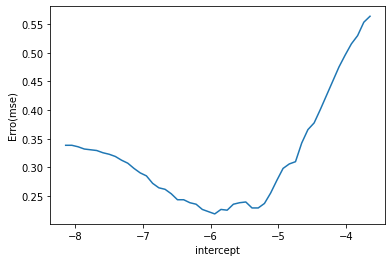

intercept:  -5.891823372754958  delta:  6.7


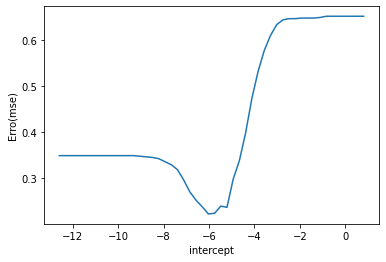

intercept:  -5.891823372754958  delta:  9.5


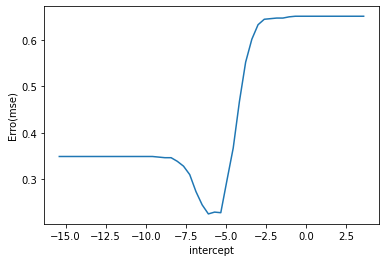

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np
import copy as cp

def find_errors(original_model, delta):
  mdl = cp.deepcopy(original_model)
  erros_intercepts = list()
  for i in range(len(original_model.intercept_)):
    intercept = original_model.intercept_[i]
    intercepts = np.linspace(intercept-delta, intercept+delta)
    errors = np.empty(intercepts.shape)
    for j in range(intercepts.shape[0]):
      mdl.intercept_[i] = intercepts[j]    
      y_pred = mdl.predict(X)
      mse = mean_squared_error(y, y_pred)
      errors[j]=mse
    erros_intercepts.append((intercept ,intercepts, errors))    
  return erros_intercepts

deltas = [2.25,6.7,9.5]
for delta in deltas:
    errors = find_errors(modelo,delta)
    for origina_intercept,intercepts,erros_list in errors:
      print("intercept: ",origina_intercept," delta: ",delta )
      plt.ylabel("Erro(mse)")
      plt.xlabel("intercept")
      plt.plot(intercepts,erros_list)
      plt.show()